# Part II - A Story - Ford GoBike System Data
## by Nguyen Gia Bao Le

## Investigation Overview
The investigation is about the Ford GoBike System Dataset, in February 2019. By investigate data, visualize the distribution and the trend of the fields, I answer the questions:
- Who are the customers of this system?
- What are the characteristics of the customers?
- What is the trend of usage the system?
- What are the differences of customer?

## Dataset Overview

Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.

Data source: 
- [https://www.bikeshare.com/data/](https://www.bikeshare.com/data/)
- [**Github** Bike-Share-Data-Systems](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems)
- [**Udacity** 201902-fordgobike-tripdata.csv](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)

## Dataset Overview

Data Structure: 

The dataset have 183412 records, 16 columns. 

| column | num records | datatype | description |
| - | - | - | - | 
| duration_sec            | 183412 | int | Trip duration (second) |
| start_time              | 183412 | text | The start time of ride |
| end_time                | 183412 | text | The end time of ride |
| start_station_id        | 183215 | float | The id of the station that start the ride |
| start_station_name      | 183215 | text | The name of the station that start the ride |
| start_station_latitude  | 183412 | float | The latitude of the station that start the ride |
| start_station_longitude | 183412 | float | The longitude of the station that start the ride |
| end_station_id          | 183215 | float | The id of the station that end the ride |
| end_station_name        | 183215 | text | The name of the station that end the ride |
| end_station_latitude    | 183412 | float | The latitude of the station that end the ride |
| end_station_longitude   | 183412 | float | The longitude of the station that end the ride |
| bike_id                 | 183412 | int | The id of the bike |
| user_type               | 183412 | text | The type of user: 'Customer' and'Subscriber' |
| member_birth_year       | 175147 | float | Year of birth of the user |
| member_gender           | 175147 | text | Gender of the user |
| bike_share_for_all_trip | 183412 | text | The user uses bike share system for all his trip | 

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
sb.__version__
plt.figure(figsize=[14, 8])

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# cleaning the dataset
df = df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'])
df['member_birth_year'] = df['member_birth_year'].fillna((df['member_birth_year'].mean()))
df['member_gender'] = df['member_gender'].fillna("Other")
df.isnull().any().any()

False

In [7]:
def draw_countplot_chart(data, x, y, hue, xlabel, ylabel, title, **kwargs):
    # plot count chart (bar chart) with dataframe, specify columns
    sb.countplot(data=data, x=x, y=y, hue=hue,**kwargs)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set chart title
    plt.title(title)

def draw_pie_chart(df, title):
    # plot pie chart with percent annotation
    plt.pie(df, labels=df.index, startangle=90, autopct='%.2f')
    # set chart title
    plt.title(title)
    
def draw_scatter_chart(data, x, y, xlabel, ylabel, title):
    # plot scatter chart with dataframe and specified columns
    sb.scatterplot(data=data, x=x, y=y)
    plt.grid(True)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set title
    plt.title(title)

def draw_histogram_chart(data, x, bins, xlabel, title, **kwargs):
    # plot histogram chart with dataframe and specified columns and bins range
    sb.histplot(data, x=x, bins=bins, **kwargs)
    plt.xlabel(xlabel)
    plt.title(title)
    
def draw_bar_chart(data,x,y,xlabel, ylabel, title, **kwargs):
    sb.barplot(x=x,y=y, data=data, ci=None, **kwargs)
    # set axis label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # set chart title
    plt.title(title)

## User Information

Question:
- The distribution of the age of users?
- The distribution of the type of users?
- The distribution of the gender of users?

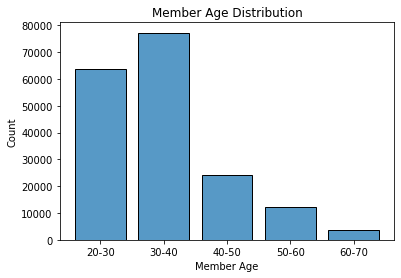

In [8]:
df['member_age'] = 2019 - df['member_birth_year']
draw_histogram_chart(df, 'member_age', np.arange(20, 80, 10), 'Member Age', 'Member Age Distribution', shrink=.8)
plt.xticks(np.arange(25, 66, 10), ["{:02d}".format(x) + "-" + "{:02d}".format(x+10) for x in range(20,61,10)])
plt.show()

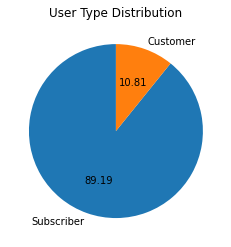

In [10]:
draw_pie_chart(df['user_type'].value_counts(), "User Type Distribution")

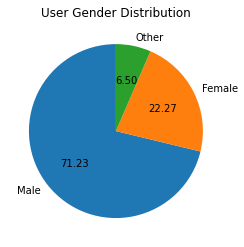

In [25]:
draw_pie_chart(df['member_gender'].value_counts(), "User Gender Distribution")

*Observations*: 
- Majority of user's age in range from 20 to 70, and the greatest amount is from 30 to 40 --> Users should be Working-Age People
- 89.19% of user is Subcriber --> Majority of user charges for Bike Share Service permanently
- Majority of user is man, greater than 3 times of woman

## Trip information

Question:
- What is the weekday that most booked?
- What is the hour that most booked?
- How is the distribution of `duration_sec`?
- The distribution of the station location on the map?
- The distribution of the route from start location to end location?

In [11]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time_weekday'] = df['start_time'].dt.weekday.astype(int)
df['start_time_hour'] = df['start_time'].dt.hour.astype(int)
df['start_time_weekday_type'] = df['start_time_weekday'].apply(lambda x: 'weekend' if x in [5,6] else 'weekday')

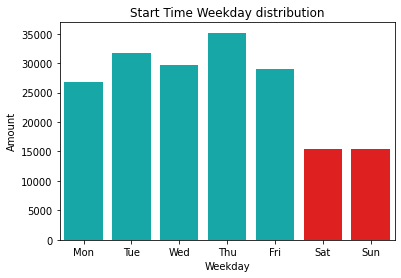

In [12]:
draw_countplot_chart(data=df, x='start_time_weekday', y=None, hue=None, xlabel='Weekday', ylabel="Amount", title='Start Time Weekday distribution', palette=['c', 'c', 'c', 'c', 'c', 'r', 'r'])
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

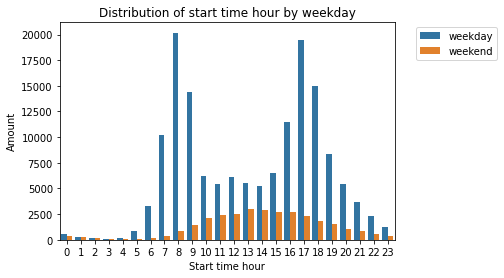

In [13]:
draw_countplot_chart(df, 'start_time_hour', None, hue='start_time_weekday_type', xlabel='Start time hour', ylabel='Amount', title='Distribution of start time hour by weekday')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

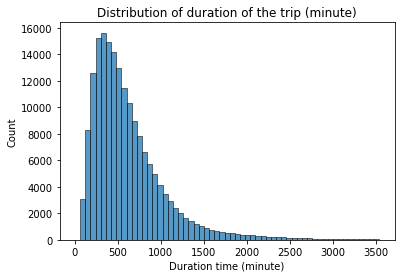

In [14]:
draw_histogram_chart(df, 'duration_sec', np.arange(0, 3600, 60), "Duration time (minute)", "Distribution of duration of the trip (minute)")

In [15]:
routes_x = []
routes_y = []
for i in range(len(df)):
    routes_x.append([df.iloc[i, 5], df.iloc[i, 9]]) 
    routes_y.append([df.iloc[i, 6], df.iloc[i, 10]]) 

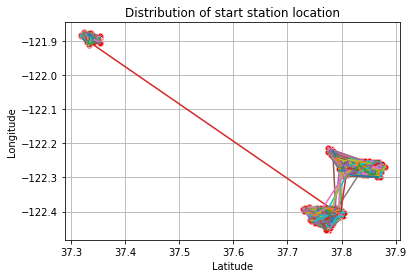

In [12]:
sb.scatterplot(data=df, x='start_station_latitude', y='start_station_longitude', color='g', alpha=1)
sb.scatterplot(data=df, x='end_station_latitude', y='end_station_longitude', color='r', alpha=0.5)

for x, y in zip(routes_x, routes_y):
    plt.plot(x, y)
    
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Distribution of start station location')
plt.show()

*Observations*: 
- 99% duration time less than 1 hour (3600 seconds)
- The duration of the trip is almost distributed from 1 to 20 minutes
- In the working day, the most booked hour is 8 and 17, these are the working hour time.
- In the weekend day, 8 and 17 aren't the most booked, but is 13 o'clock 
- Stations could be in 3 cities.
- If 3 cities named "one", "two", "three" from left to right, the popular route of 2 different cites is between city "two" and city "three"

## The affect of user type to other fields

Question:
- How is the distribution of the member_gender and user_type?
- How is the distribution of user_type and member_gender to duraton time?
- How is the distribution of hour and weekday by user type?

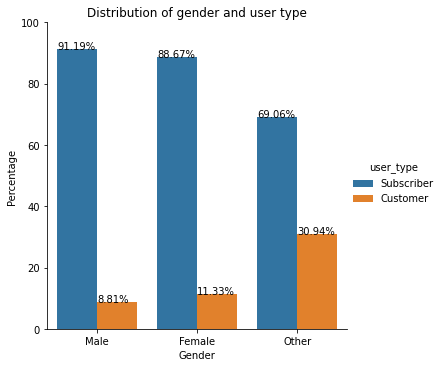

In [16]:
x,y = 'member_gender', 'user_type'
df_temp = df.groupby(x)[y].value_counts(normalize=True)
df_temp = df_temp.mul(100)
df_temp = df_temp.rename('percent').reset_index()
g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df_temp, order = df_temp['member_gender'].value_counts().index)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Distribution of gender and user type")
plt.show()

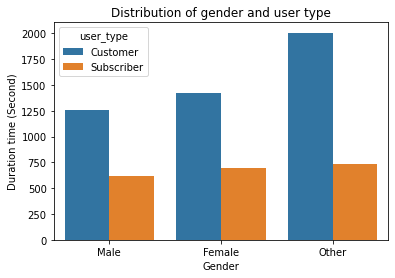

In [17]:
draw_bar_chart(df, 'member_gender', 'duration_sec', 'Gender', 'Duration time (Second)', "Distribution of gender and user type", hue='user_type', order = df['member_gender'].value_counts().index)

In [18]:
df_customer = df[df['user_type'] == "Customer"].groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")

df_subcriber = df[df['user_type'] == "Subscriber"].groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subcriber = df_subcriber.pivot("start_time_hour", "start_time_weekday", "bike_id")

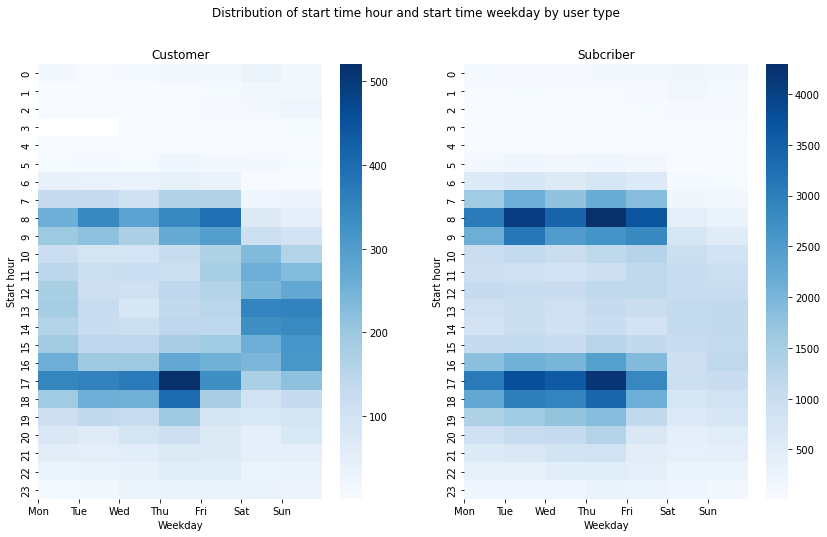

In [19]:
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
sb.heatmap(df_customer, cmap='Blues')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Start hour')
plt.title('Customer')

plt.subplot(1, 2, 2)
sb.heatmap(df_subcriber, cmap='Blues')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday')
plt.ylabel('Start hour')
plt.title('Subcriber')

plt.suptitle("Distribution of start time hour and start time weekday by user type")
plt.show()


*Observation*:
- Male user pay for system more than female user
- Female customers ride longer than male user
- With "Customer" user, they use the system in all day of the week. In weekday, they use in the working hour, and in the weekend, they use in the afternoon. --> "Customer" using system in weekday like the officer staff, other using in weekend like the travelers
- With "Subcriber" user, who pay for the system, they use almost in the weekday and the working time (8AM and 5PM), so they should be the officer staff

## Summary

User of this system could be office staff, especially the Subscriber Users, because:
- They use the system in the before and the after of working hour
- They are in working age
- They use the system in the working day more than the weekend day
- They use the system for the short trip, in the same city and less than 20 minutes

In [26]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 467835 bytes to Part_II_slide_deck.slides.html
